In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [44]:
df = pd.read_csv("/content/drive/MyDrive/cardiovascular_risk/data_cardiovascular_risk.csv")

<h2>EDA

In [ ]:
df.head(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   
6   6   61        1.0   M         NO         0.0     0.0                0   
7   7   36        4.0   M        YES        35.0     0.0                0   
8   8   41        2.0   F        YES        20.0     NaN                0   
9   9   55        2.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0      NaN   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

In [12]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [14]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

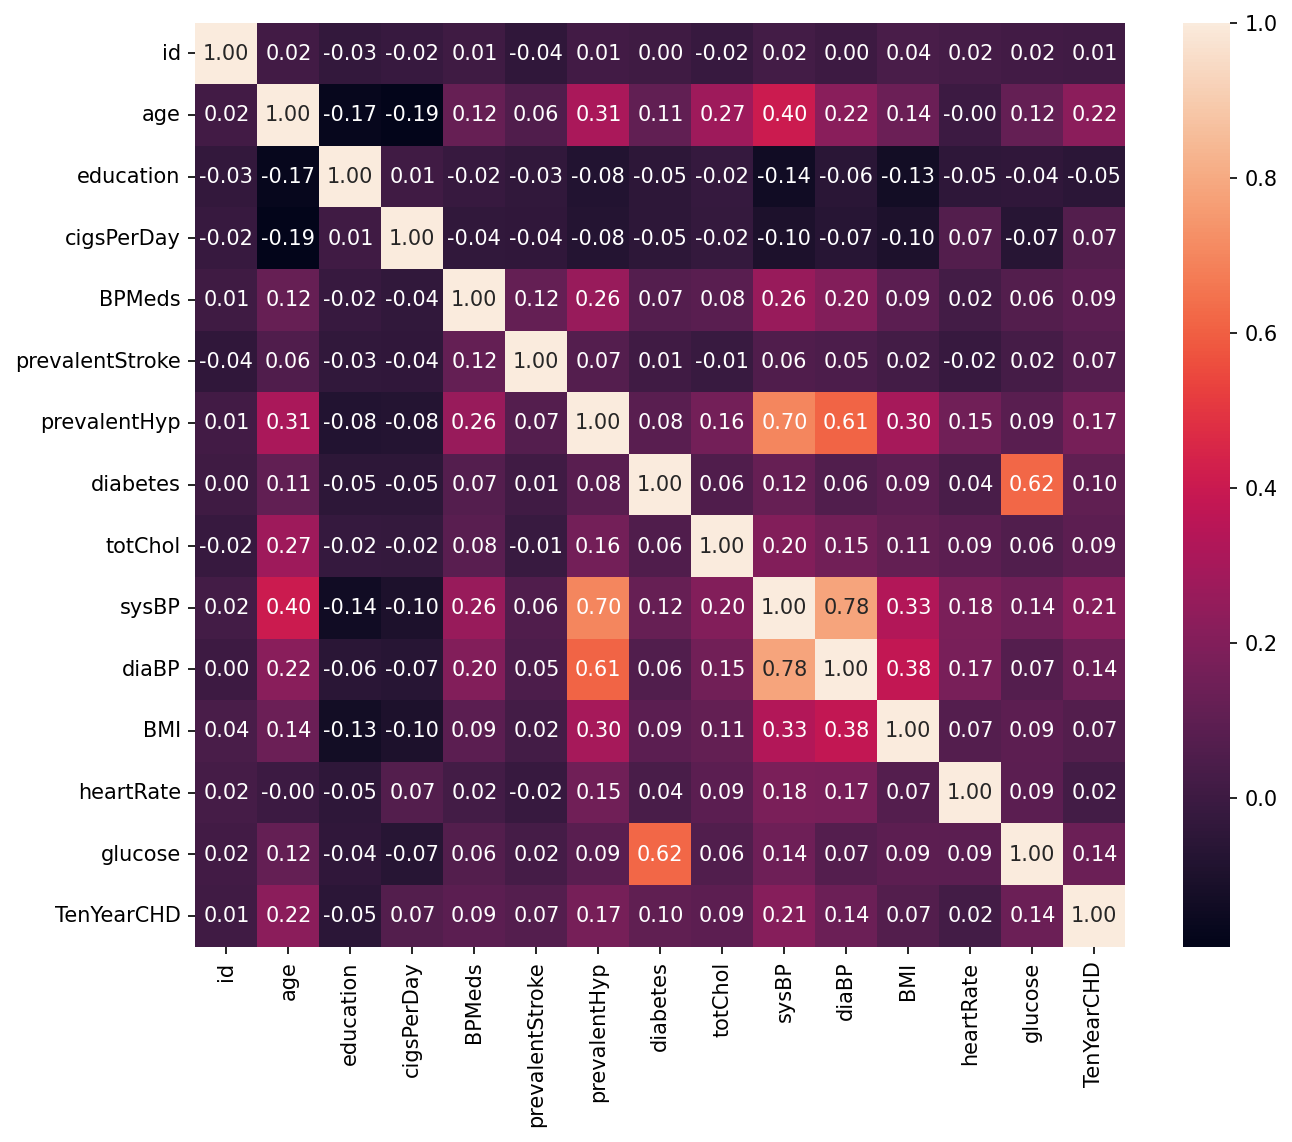

In [18]:
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [19]:
df[df['glucose'].isna()]

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
9        9   55        2.0   F         NO         0.0     0.0   
10      10   61        1.0   F         NO         0.0     0.0   
36      36   46        3.0   F         NO         0.0     0.0   
38      38   41        2.0   F        YES         9.0     1.0   
55      55   51        2.0   F         NO         0.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3289  3289   40        2.0   M        YES        10.0     0.0   
3290  3290   67        1.0   F         NO         0.0     0.0   
3349  3349   46        2.0   F         NO         0.0     0.0   
3370  3370   46        1.0   F        YES        30.0     0.0   
3379  3379   39        1.0   M        YES        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
9                   0             1         0    326.0  144.0   81.0  25.71   
10                  0             1         0      NaN  185.0  121.0  35.22   
36                  0             0         0    193.0  106.5   70.5  26.18   
38                  1             1         0    180.0  114.0   70.0  22.41   
55                  0             1         0    351.0  134.0   97.5  21.66   
...               ...           ...       ...      ...    ...    ...    ...   
3289                0             0         0    195.0  110.0   70.0  24.75   
3290                0             1         0      NaN  173.0  100.0  33.60   
3349                0             0         0    242.0  129.0   85.0  27.40   
3370                0             0         0    219.0  107.0   69.0  21.40   
3379                0             0         0    292.0  120.0   85.0  31.09   

      heartRate  glucose  TenYearCHD  
9          85.0      NaN           0  
10         80.0      NaN           0  
36         75.0      NaN           0  
38         92.0      NaN           0  
55        100.0      NaN           0  
...         ...      ...         ...  
3289       79.0      NaN           0  
3290       60.0      NaN           0  
3349       80.0      NaN           1  
3370       66.0      NaN           0  
3379       85.0      NaN           0  

[304 rows x 17 columns]

In [21]:
df.isna().sum() / len(df)

id                 0.000000
age                0.000000
education          0.025664
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.006490
BPMeds             0.012979
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011209
sysBP              0.000000
diaBP              0.000000
BMI                0.004130
heartRate          0.000295
glucose            0.089676
TenYearCHD         0.000000
dtype: float64

In [45]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   float64
 16  TenYearCHD       2927 non-null   int64  
dtypes: float64(9),

In [31]:
df['TenYearCHD'].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

In [32]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [33]:
df = df.drop('id', axis=1)

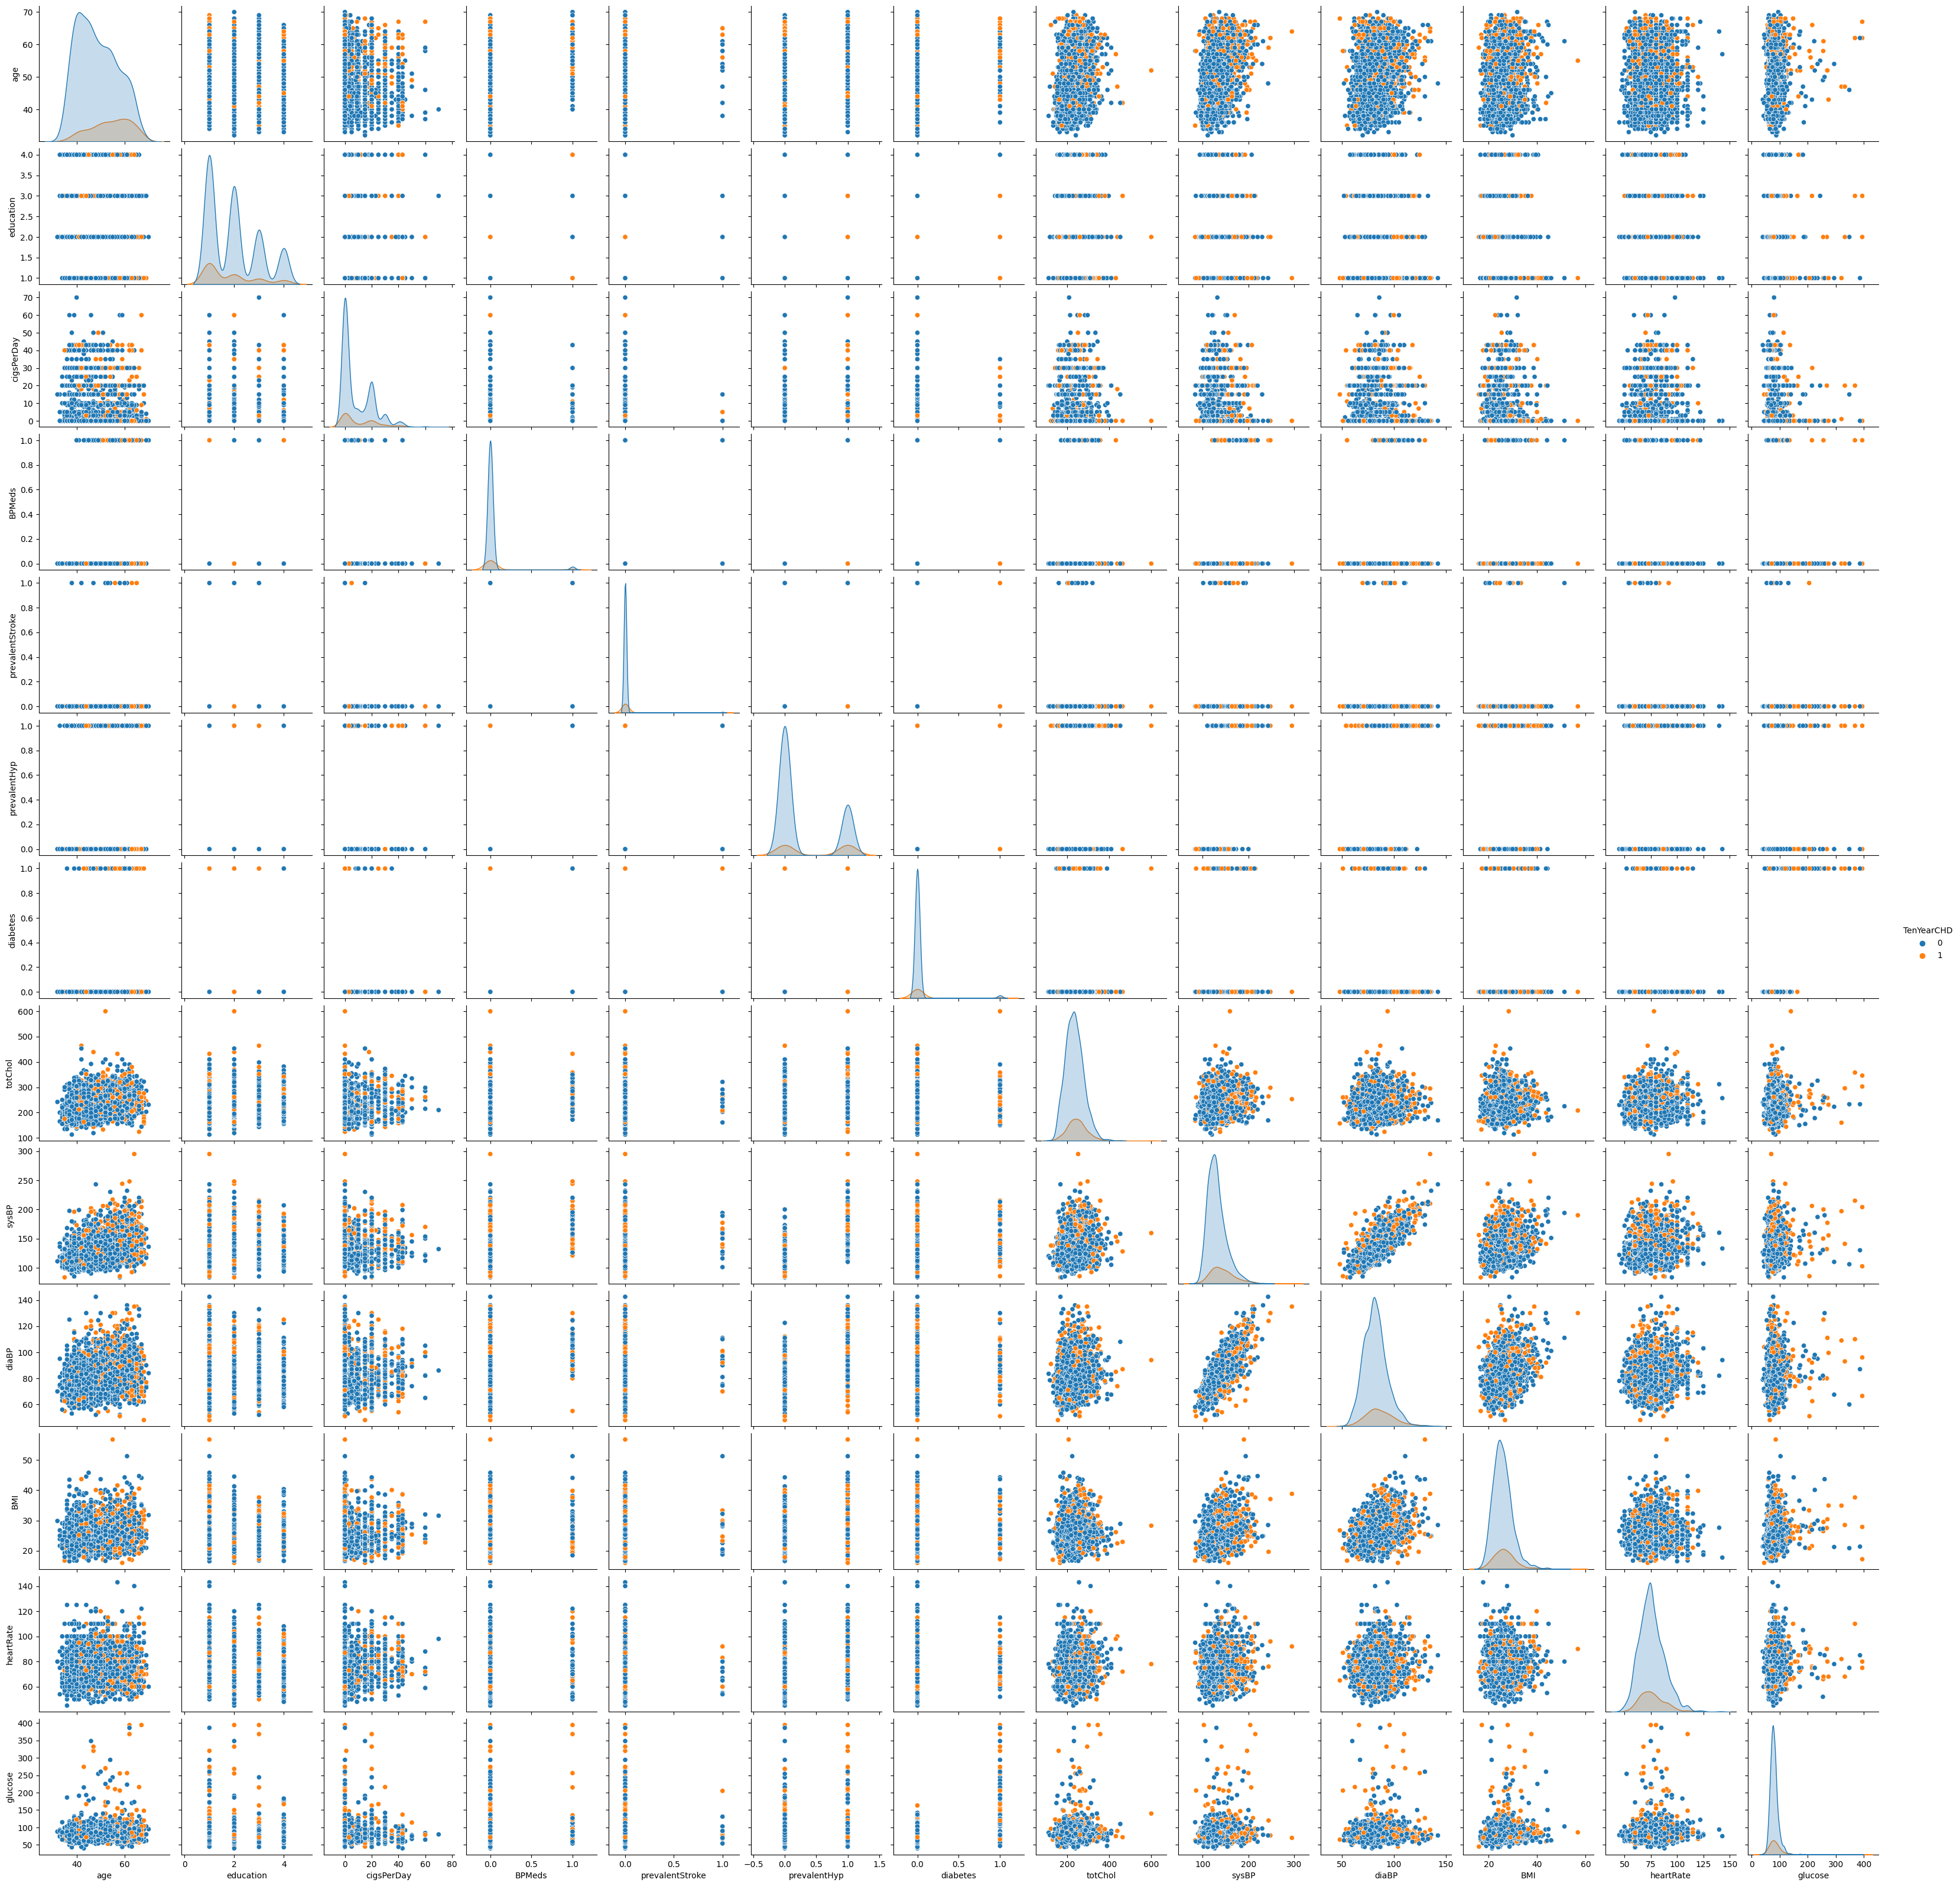

In [34]:
sns.pairplot(df, hue='TenYearCHD')

In [36]:
for column in df.columns:
  print(column)
  print(df[column].value_counts())

age
40    130
42    129
46    128
41    122
39    120
44    115
45    114
48    114
43    106
38    103
52    101
50    100
55     99
53     98
54     97
51     97
49     91
47     86
60     84
57     84
63     82
56     81
58     78
59     76
62     73
61     73
36     68
37     65
64     63
65     36
67     27
66     27
35     24
34     13
68     13
33      4
69      4
70      1
32      1
Name: age, dtype: int64
education
1.0    1240
2.0     874
3.0     487
4.0     326
Name: education, dtype: int64
sex
F    1620
M    1307
Name: sex, dtype: int64
is_smoking
NO     1480
YES    1447
Name: is_smoking, dtype: int64
cigsPerDay
0.0     1480
20.0     538
30.0     158
15.0     147
10.0      88
5.0       87
9.0       81
3.0       68
40.0      53
1.0       44
43.0      38
25.0      37
2.0       15
35.0      14
6.0       13
8.0        8
7.0        8
60.0       6
18.0       6
4.0        6
17.0       5
23.0       5
50.0       4
11.0       4
13.0       3
12.0       3
45.0       2
16.0       2
19.0 

In [38]:
df.duplicated().any()

False

In [40]:
df.describe(include='all')

age    education   sex is_smoking   cigsPerDay       BPMeds  \
count   2927.000000  2927.000000  2927       2927  2927.000000  2927.000000   
unique          NaN          NaN     2          2          NaN          NaN   
top             NaN          NaN     F         NO          NaN          NaN   
freq            NaN          NaN  1620       1480          NaN          NaN   
mean      49.507345     1.965494   NaN        NaN     9.112743     0.030065   
std        8.597191     1.017199   NaN        NaN    11.882784     0.170795   
min       32.000000     1.000000   NaN        NaN     0.000000     0.000000   
25%       42.000000     1.000000   NaN        NaN     0.000000     0.000000   
50%       49.000000     2.000000   NaN        NaN     0.000000     0.000000   
75%       56.000000     3.000000   NaN        NaN    20.000000     0.000000   
max       70.000000     4.000000   NaN        NaN    70.000000     1.000000   

        prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count       2927.000000   2927.000000  2927.000000  2927.000000  2927.000000   
unique              NaN           NaN          NaN          NaN          NaN   
top                 NaN           NaN          NaN          NaN          NaN   
freq                NaN           NaN          NaN          NaN          NaN   
mean           0.006150      0.314315     0.026990   237.129142   132.626409   
std            0.078192      0.464322     0.162082    44.613282    22.326197   
min            0.000000      0.000000     0.000000   113.000000    83.500000   
25%            0.000000      0.000000     0.000000   206.000000   117.000000   
50%            0.000000      0.000000     0.000000   234.000000   128.500000   
75%            0.000000      1.000000     0.000000   264.000000   144.000000   
max            1.000000      1.000000     1.000000   600.000000   295.000000   

              diaBP          BMI    heartRate      glucose   TenYearCHD  
count   2927.000000  2927.000000  2927.000000  2927.000000  2927.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean      82.906218    25.797041    75.888282    81.934404     0.151691  
std       12.078873     4.130376    11.971207    24.106943     0.358783  
min       48.000000    15.960000    45.000000    40.000000     0.000000  
25%       74.500000    23.030000    68.000000    71.000000     0.000000  
50%       82.000000    25.380000    75.000000    78.000000     0.000000  
75%       90.000000    28.040000    83.000000    87.000000     0.000000  
max      142.500000    56.800000   143.000000   394.000000     1.000000

In [46]:
df['education'] = df['education'].astype('object')
df['BPMeds'] = df['BPMeds'].astype('object')
df['prevalentStroke'] = df['prevalentStroke'].astype('object')
df['prevalentHyp'] = df['prevalentHyp'].astype('object')
df['diabetes'] = df['diabetes'].astype('object')

In [47]:
X = pd.get_dummies(df.drop('TenYearCHD', axis=1), drop_first=True)
y = df['TenYearCHD']

In [48]:
X.head()

id  age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1   1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0   
2   2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0   
3   3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0   
4   4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0   
5   5   61         0.0    272.0  182.0  121.0  32.80       85.0     65.0   

   education_2.0  education_3.0  education_4.0  sex_M  is_smoking_YES  \
1              0              0              1      1               0   
2              0              0              0      0               1   
3              0              0              0      1               1   
4              0              0              0      0               1   
5              0              1              0      0               0   

   BPMeds_1.0  prevalentStroke_1  prevalentHyp_1  diabetes_1  
1           0                  0               1           0  
2           0                  0               0           0  
3           0                  0               1           0  
4           0                  0               0           0  
5           0                  0               1           0

In [49]:
X.drop('id', axis=1, inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [51]:
sm = SMOTE(sampling_strategy="minority")
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [52]:
X_train_resample.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0   68         0.0    241.0  154.0   96.0  30.12      103.0     70.0   
1   62         7.0    260.0  104.0   69.0  24.02       70.0     93.0   
2   38        15.0    178.0   96.0   67.0  20.40       65.0     82.0   
3   38        23.0    165.0  128.0   80.0  25.62       90.0     85.0   
4   63         0.0    190.0  148.0   90.0  27.13       72.0     86.0   

   education_2.0  education_3.0  education_4.0  sex_M  is_smoking_YES  \
0              0              1              0      0               0   
1              0              0              0      1               1   
2              0              0              1      0               1   
3              0              1              0      1               1   
4              0              0              0      1               0   

   BPMeds_1.0  prevalentStroke_1  prevalentHyp_1  diabetes_1  
0           0                  0               1           0  
1           0                  0               0           0  
2           0                  0               0           0  
3           0                  0               1           0  
4           0                  0               1           0

In [53]:
y_train_resample.value_counts()

0    2116
1    2116
Name: TenYearCHD, dtype: int64

In [56]:
clf_1 = LogisticRegressionCV(n_jobs=-1, cv=3, max_iter=3000)
clf_2 = SVC()

clf_3 = DecisionTreeClassifier()
clf_4 = ExtraTreeClassifier()

clf_5 = RandomForestClassifier(n_estimators=500,n_jobs=-1)
clf_6 = GradientBoostingClassifier(n_estimators=500)
clf_7= AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=500)

clf_list=[clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7]

In [57]:
def print_model_locations():
    print("-"*80)
    i=0
    for clf in clf_list:
        print(f"{clf.__class__.__name__:30} at index {i}")
        print("-"*80)
        i+=1

print_model_locations()

--------------------------------------------------------------------------------
LogisticRegressionCV           at index 0
--------------------------------------------------------------------------------
SVC                            at index 1
--------------------------------------------------------------------------------
DecisionTreeClassifier         at index 2
--------------------------------------------------------------------------------
ExtraTreeClassifier            at index 3
--------------------------------------------------------------------------------
RandomForestClassifier         at index 4
--------------------------------------------------------------------------------
GradientBoostingClassifier     at index 5
--------------------------------------------------------------------------------
AdaBoostClassifier             at index 6
--------------------------------------------------------------------------------


In [58]:
%%time
print("-"*80)
for clf in clf_list:
    clf.fit(X_train_resample, y_train_resample.values.ravel())
    print("Fitting",clf.__class__.__name__,"done")
    print('-'*80)

--------------------------------------------------------------------------------
Fitting LogisticRegressionCV done
--------------------------------------------------------------------------------
Fitting SVC done
--------------------------------------------------------------------------------
Fitting DecisionTreeClassifier done
--------------------------------------------------------------------------------
Fitting ExtraTreeClassifier done
--------------------------------------------------------------------------------
Fitting RandomForestClassifier done
--------------------------------------------------------------------------------
Fitting GradientBoostingClassifier done
--------------------------------------------------------------------------------
Fitting AdaBoostClassifier done
--------------------------------------------------------------------------------
CPU times: user 14.3 s, sys: 474 ms, total: 14.7 s
Wall time: 16.2 s


--------------------------------------------------------------------------------
LogisticRegressionCV
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       367
           1       0.26      0.48      0.33        73

    accuracy                           0.68       440
   macro avg       0.57      0.60      0.56       440
weighted avg       0.77      0.68      0.72       440

--------------------------------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       367
           1       0.30      0.74      0.42        73

    accuracy                           0.67       440
   macro avg       0.61      0.70      0.59       440
weighted avg       0.82      0.67      0.71       440

--------------------------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support



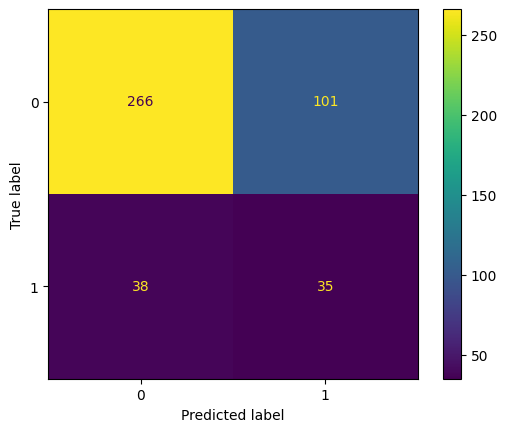

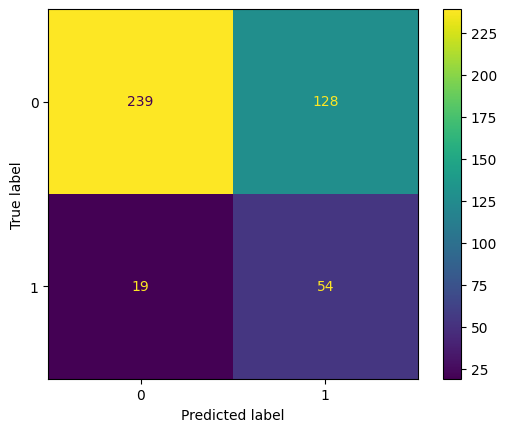

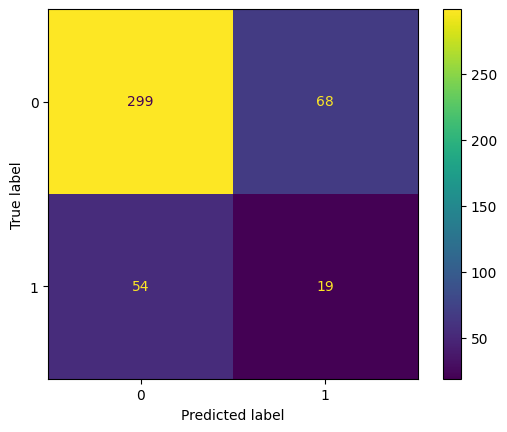

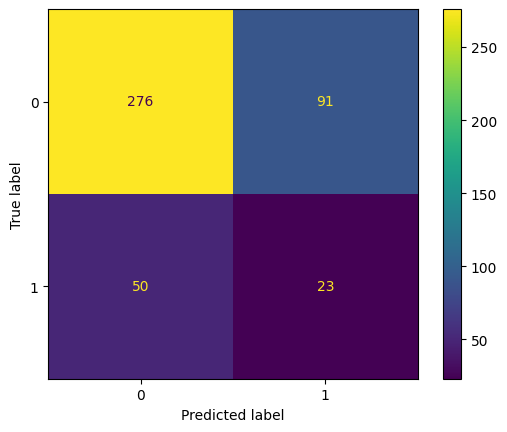

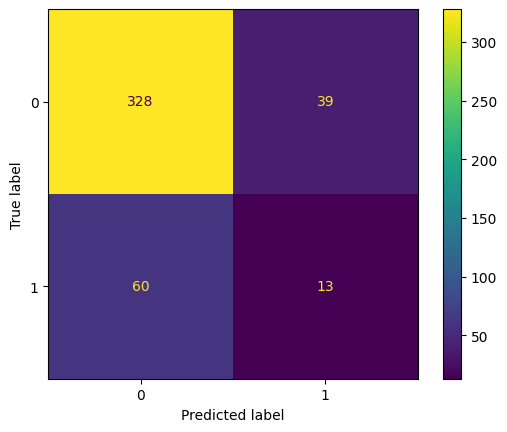

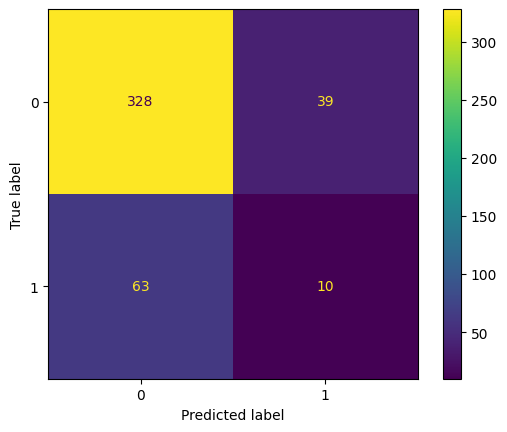

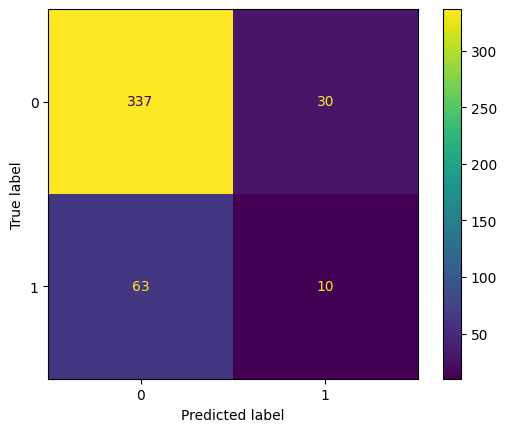

In [61]:
score_dict={}

for clf in clf_list:

    clf_name=(clf.__class__.__name__)
    pred=clf.predict(X_test)

    print("-"*80)
    print(clf_name)
    print(classification_report(y_test.values,pred))
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

    score_dict[clf_name]={
        'roc_auc_score':roc_auc_score(y_test.values,pred)
    }

print("-"*80)

In [62]:
dtree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='f1')
tree_grid.fit(X_train_resample, y_train_resample)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [63]:
dtree.set_params(criterion='gini', max_depth=4, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=20)

In [64]:
dtree.fit(X_train_resample, y_train_resample)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=20)

In [65]:
pred = dtree.predict(X_test)

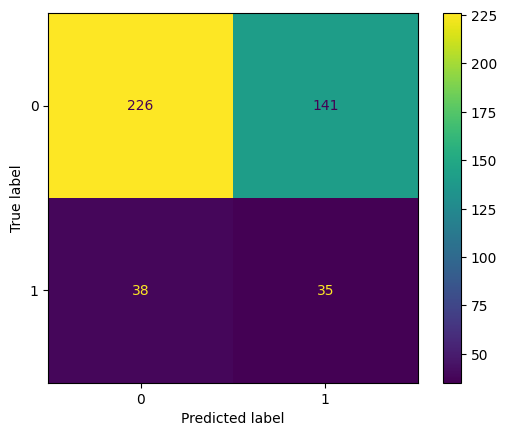

In [66]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)

In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       367
           1       0.20      0.48      0.28        73

    accuracy                           0.59       440
   macro avg       0.53      0.55      0.50       440
weighted avg       0.75      0.59      0.64       440



In [68]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [71]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='f1')
rforest_grid.fit(X_train_resample, y_train_resample)
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [77]:
rforest.set_params(criterion = 'entropy',
                  min_samples_leaf = 30,
                  min_samples_split = 20,
                  max_depth = 5,
                  n_estimators=500)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20, n_estimators=500, oob_score=True,
                       random_state=101)

In [78]:
rforest.fit(X_train_resample, y_train_resample)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20, n_estimators=500, oob_score=True,
                       random_state=101)

In [79]:
pred = rforest.predict(X_test)

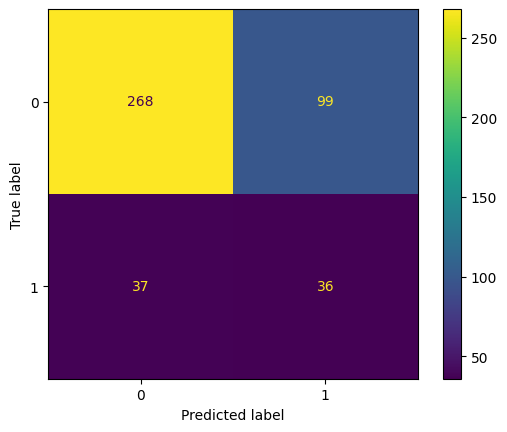

In [80]:
ConfusionMatrixDisplay.from_estimator(rforest, X_test, y_test)

In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       367
           1       0.27      0.49      0.35        73

    accuracy                           0.69       440
   macro avg       0.57      0.61      0.57       440
weighted avg       0.78      0.69      0.72       440



In [82]:
min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(X_train_resample, y_train_resample)

    oob_error = 1 - rforest.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

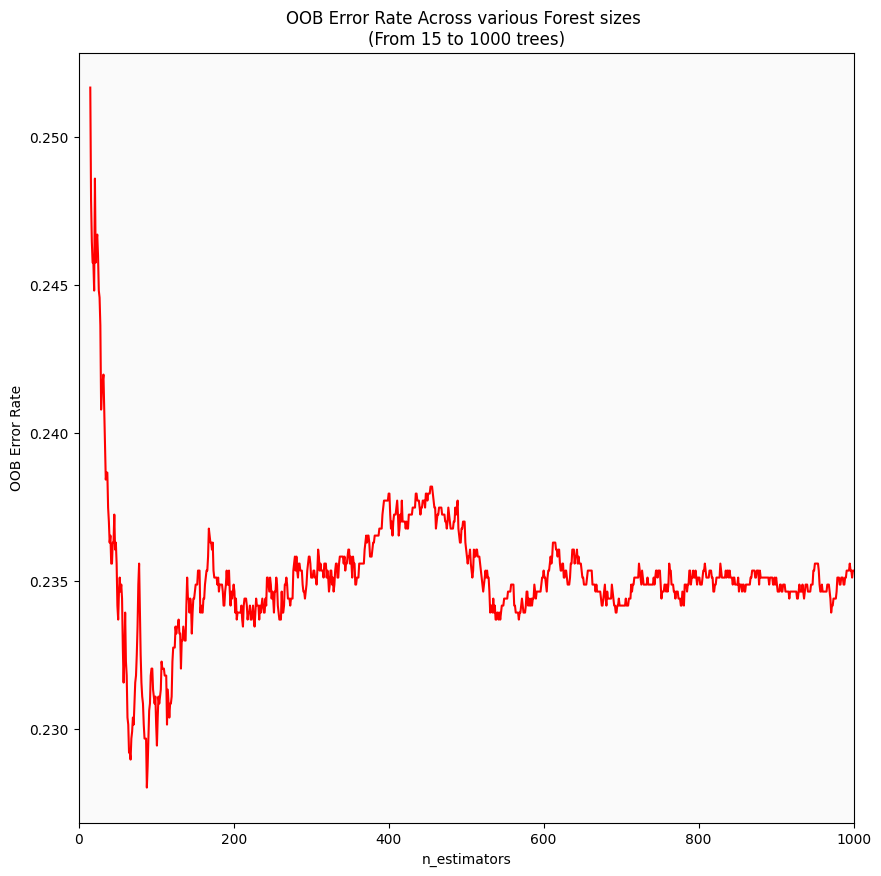

In [83]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [84]:
scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [86]:
svm_model = SVC(class_weight='balanced', random_state=101)

In [87]:
param_grid = {'C': [1.0, 5.0, 10.0, 100.0],
              'kernel': ['rbf', 'poly'],
              'degree': [2,3,4]}


In [88]:
svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='f1')
svm_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

Best Parameters using grid search: 
 {'C': 1.0, 'degree': 2, 'kernel': 'poly'}


In [89]:
svm_model = svm_grid.best_estimator_

In [90]:
svm_model.fit(scaled_X_train, y_train)

In [109]:
pred = svm_model.predict(scaled_X_test)

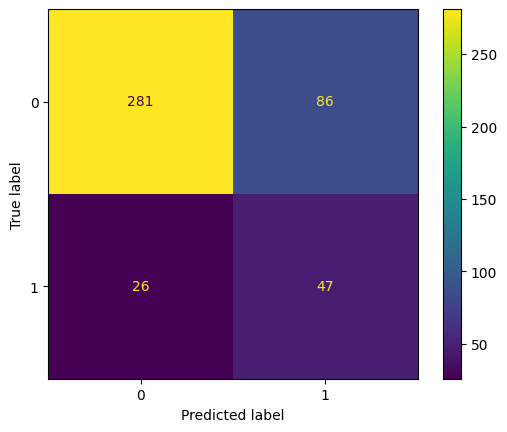

In [91]:
ConfusionMatrixDisplay.from_estimator(svm_model, scaled_X_test, y_test)

In [110]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.83       367
           1       0.35      0.64      0.46        73

    accuracy                           0.75       440
   macro avg       0.63      0.70      0.65       440
weighted avg       0.82      0.75      0.77       440



In [92]:
!pip install xgboost

In [93]:
import xgboost as xgb

In [94]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', )

In [95]:
param_grid = {'max_depth': [3, 4, 5]}

In [96]:
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=10)

In [97]:
xgb_grid_model.fit(X_train_resample, y_train_resample)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 4, 5]}, scoring='f1')

In [98]:
xgb_model = xgb_grid_model.best_estimator_

In [104]:
xgb_model.set_params(n_estimators = 500)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
xgb_model.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [106]:
pred = xgb_model.predict(X_test)

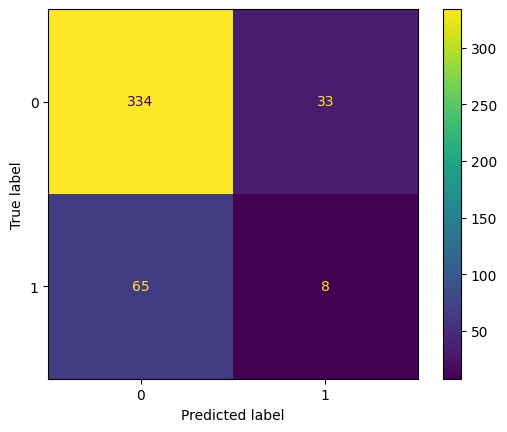

In [107]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)

In [108]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       367
           1       0.20      0.11      0.14        73

    accuracy                           0.78       440
   macro avg       0.52      0.51      0.51       440
weighted avg       0.73      0.78      0.75       440



In [22]:
df['glucose'].value_counts()

75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

In [23]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [25]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: >

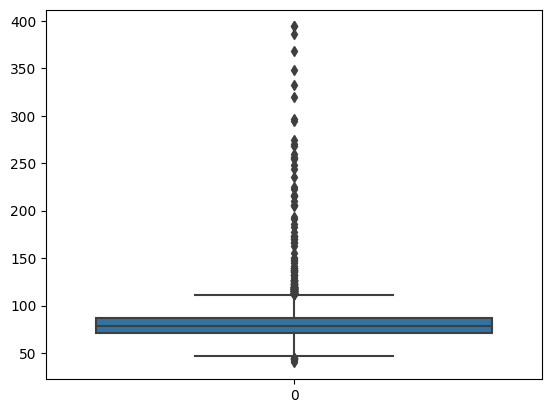

In [28]:
sns.boxplot(df['glucose'])